#Algorify - Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

In [ ]:
import warnings

warnings.filterwarnings('ignore')

##Struktur Data

In [ ]:
import pandas as pd

# Path ke file Excel
file_path = '/content/Data SML Fix.xlsx'

# Baca file Excel
df = pd.read_excel(file_path)

# Tampilkan beberapa baris pertama
df.head()



,Tahun,Provinsi,Tingkat Pengangguran Terbuka (TPT),Tingkat Partisipasi Angkatan Kerja (TPAK),Persentase Jumlah Pekerja Rentan,Persentase Pekerja Sektor Informal,Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja
0,2021,ACEH,"6,300","63,780",8.35,58.35,61.03
1,2021,SUMATERA UTARA,"6,330","69,100",9.06,59.17,65.22
2,2021,SUMATERA BARAT,"6,520","67,720",9.66,63.59,63.85
3,2021,RIAU,"4,420","65,030",10.30,52.06,62.55
4,2021,JAMBI,"5,090","67,170",10.62,62.79,64.10


##EDA

In [ ]:
df.shape

(68, 7)

In [ ]:
df.head()

,Tahun,Provinsi,Tingkat Pengangguran Terbuka (TPT),Tingkat Partisipasi Angkatan Kerja (TPAK),Persentase Jumlah Pekerja Rentan,Persentase Pekerja Sektor Informal,Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja
0,2021,ACEH,"6,300","63,780",8.35,58.35,61.03
1,2021,SUMATERA UTARA,"6,330","69,100",9.06,59.17,65.22
2,2021,SUMATERA BARAT,"6,520","67,720",9.66,63.59,63.85
3,2021,RIAU,"4,420","65,030",10.30,52.06,62.55
4,2021,JAMBI,"5,090","67,170",10.62,62.79,64.10


In [ ]:
df.describe()

,Tahun,Persentase Jumlah Pekerja Rentan,Persentase Pekerja Sektor Informal,Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja
count,68.000000,68.000000,68.000000,68.000000
mean,2021.500000,7.230147,60.365294,65.015000
std,0.503718,3.098394,10.261885,4.079204
min,2021.000000,0.760000,33.500000,57.290000
25%,2021.000000,4.702500,56.280000,61.692500
50%,2021.500000,6.970000,61.040000,65.410000
75%,2022.000000,9.830000,63.885000,67.630000
max,2022.000000,12.390000,86.490000,77.340000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Tahun                                                          68 non-null     int64  
 1   Provinsi                                                       68 non-null     object 
 2   Tingkat Pengangguran Terbuka (TPT)                             68 non-null     object 
 3   Tingkat Partisipasi Angkatan Kerja (TPAK)                      68 non-null     object 
 4   Persentase Jumlah Pekerja Rentan                               68 non-null     float64
 5   Persentase Pekerja Sektor Informal                             68 non-null     float64
 6   Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja  68 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.8+ KB


Ubah Kolom Tingkat Pengangguran Terbuka dan Tingkat Partisipasi Angkatan Kerja jadi numerik

In [ ]:
# Pastikan kolom jadi string dulu, lalu bersihkan koma, lalu ubah ke float
df['Tingkat Pengangguran Terbuka (TPT)'] = df['Tingkat Pengangguran Terbuka (TPT)'].astype(str).str.replace(',', '.')
df['Tingkat Pengangguran Terbuka (TPT)'] = pd.to_numeric(df['Tingkat Pengangguran Terbuka (TPT)'], errors='coerce')

df['Tingkat Partisipasi Angkatan Kerja (TPAK)'] = df['Tingkat Partisipasi Angkatan Kerja (TPAK)'].astype(str).str.replace(',', '.')
df['Tingkat Partisipasi Angkatan Kerja (TPAK)'] = pd.to_numeric(df['Tingkat Partisipasi Angkatan Kerja (TPAK)'], errors='coerce')

# Cek hasilnya
print(df[['Tingkat Pengangguran Terbuka (TPT)', 'Tingkat Partisipasi Angkatan Kerja (TPAK)']].dtypes)


Tingkat Pengangguran Terbuka (TPT)           float64
Tingkat Partisipasi Angkatan Kerja (TPAK)    float64
dtype: object


In [ ]:
df.isnull().sum()

,0
Tahun,0
Provinsi,0
Tingkat Pengangguran Terbuka (TPT),0
Tingkat Partisipasi Angkatan Kerja (TPAK),0
Persentase Jumlah Pekerja Rentan,0
Persentase Pekerja Sektor Informal,0
Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja,0


#Statistik Deskriptif

In [ ]:
# Statistik deskriptif untuk kolom numerik
print(df.describe())

             Tahun  Tingkat Pengangguran Terbuka (TPT)  \
count    68.000000                           68.000000   
mean   2021.500000                            5.229118   
std       0.503718                            1.720655   
min    2021.000000                            2.340000   
25%    2021.000000                            4.040000   
50%    2021.500000                            4.875000   
75%    2022.000000                            6.197500   
max    2022.000000                            9.910000   

       Tingkat Partisipasi Angkatan Kerja (TPAK)  \
count                                  68.000000   
mean                                   68.384853   
std                                     3.544460   
min                                    62.150000   
25%                                    65.685000   
50%                                    68.700000   
75%                                    70.015000   
max                                    78.290000   

       P

#Distribusi Nilai untuk Setiap Kolom

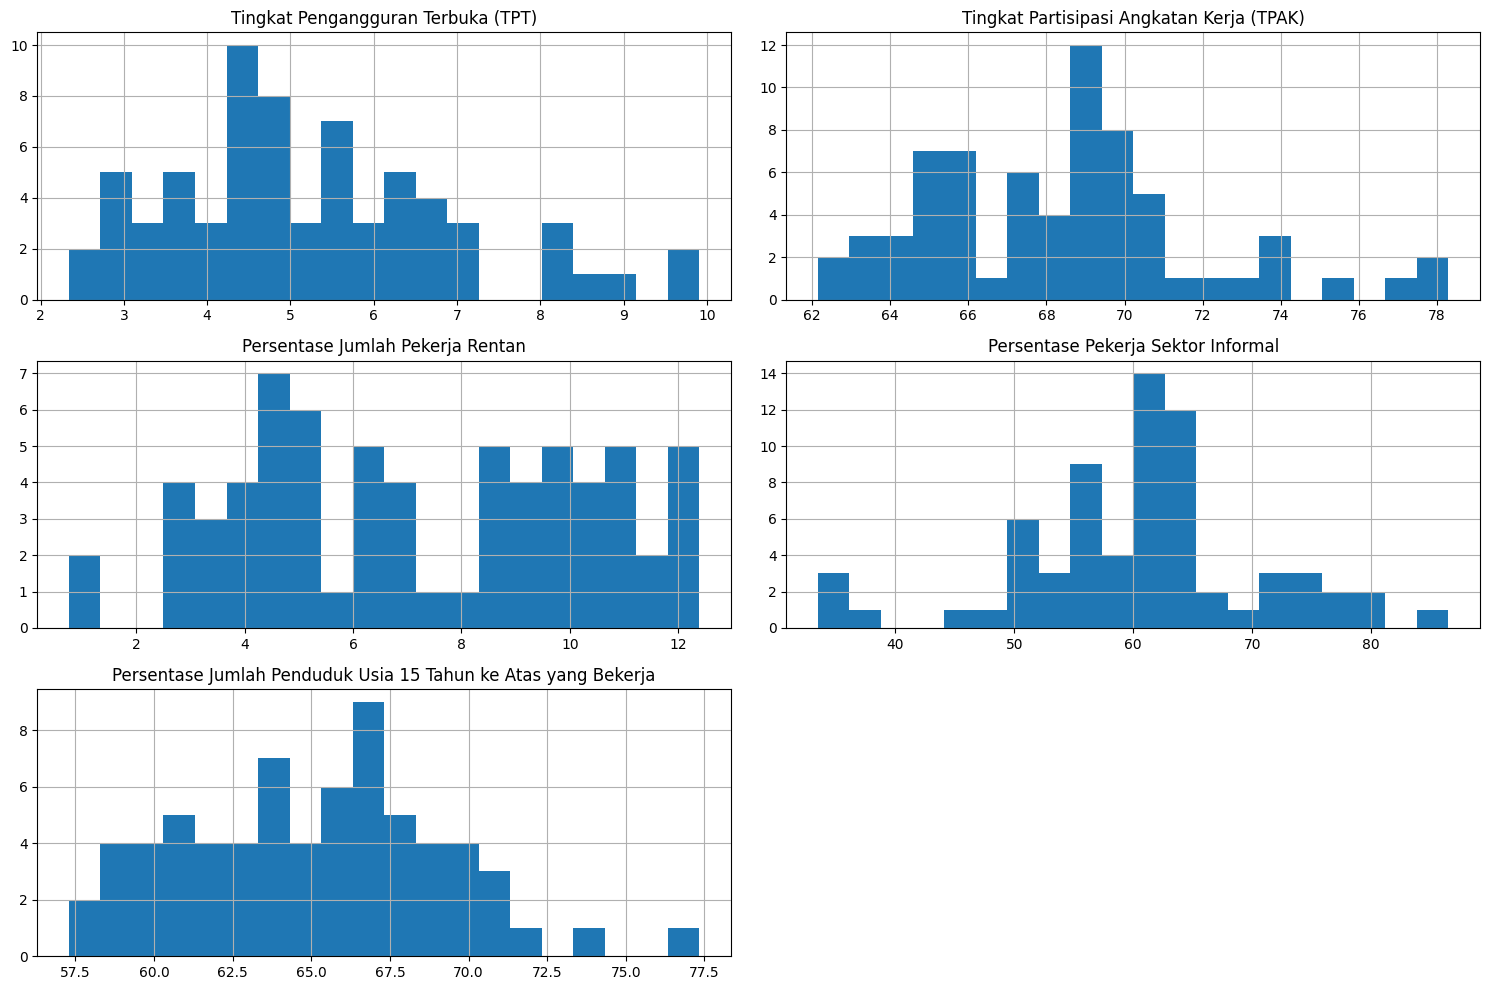

In [ ]:
df.drop(columns=['Tahun']).hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

#Visualisasi Korelasi

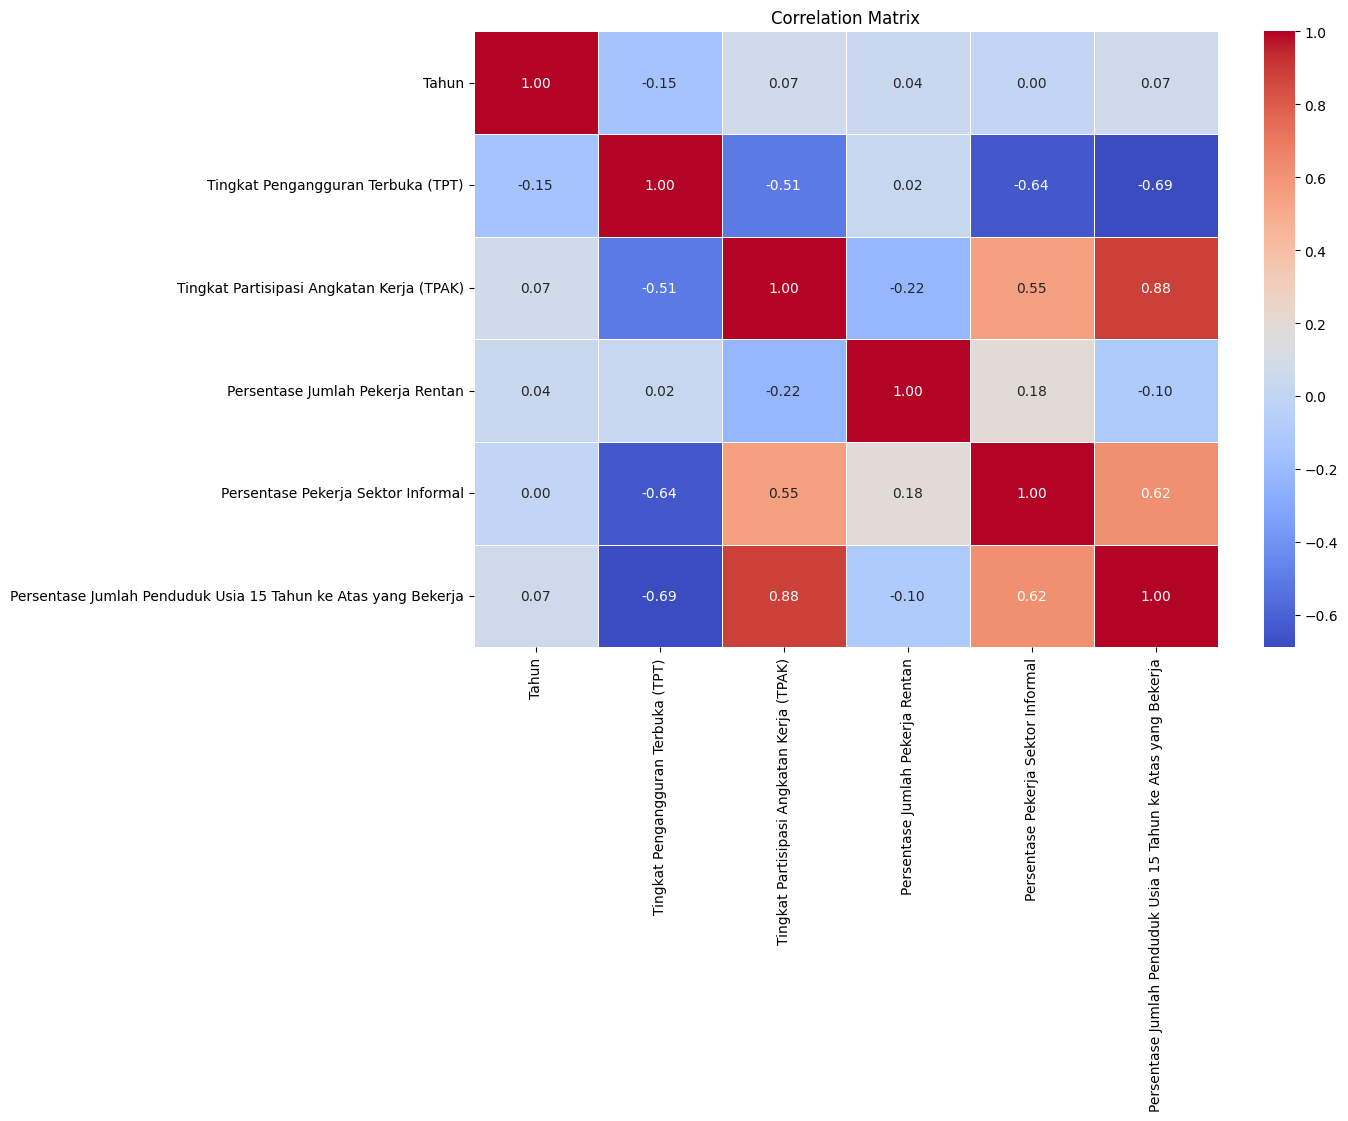

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik untuk korelasi
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Matriks korelasi untuk kolom numerik
correlation_matrix = numerical_df.corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#BarPlot

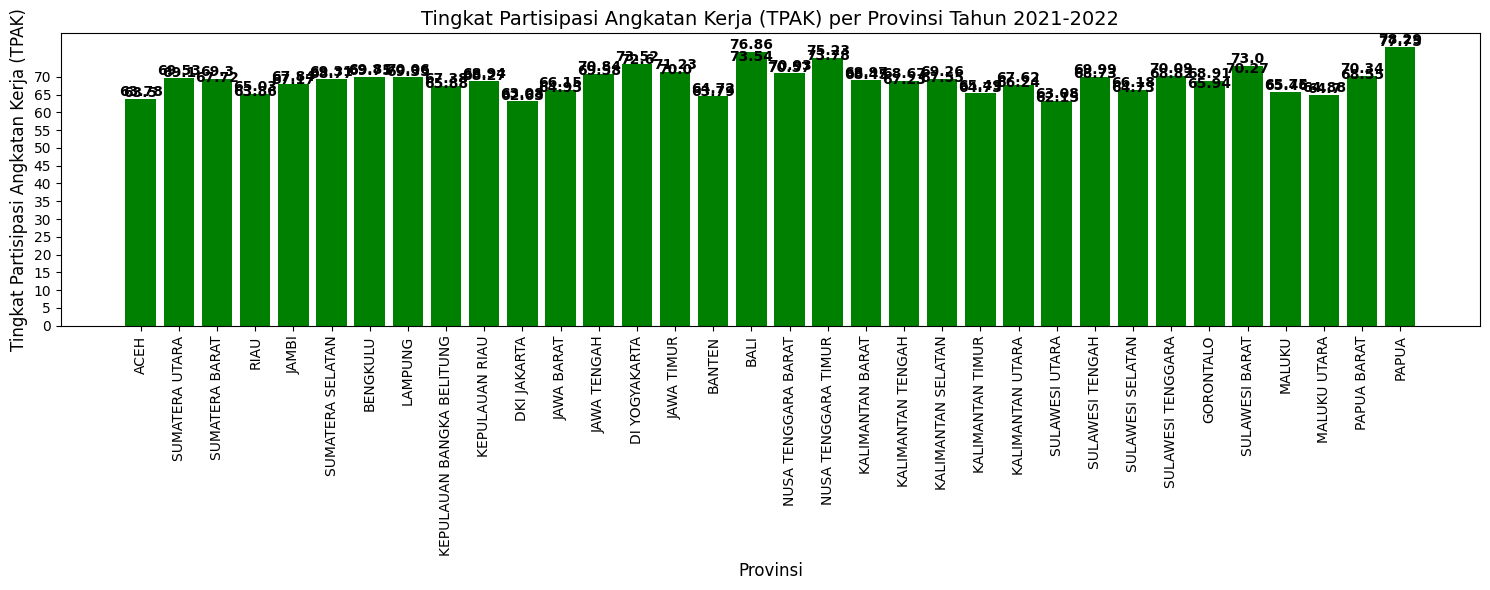

In [ ]:
import matplotlib.pyplot as plt

# Anggap df sudah memuat data yang sesuai
tpt = df['Tingkat Partisipasi Angkatan Kerja (TPAK)']  # Gantilah dengan kolom yang sesuai dari data kamu

# Plot grafik batang
plt.figure(figsize=(15, 6))
bars_tpt = plt.bar(df['Provinsi'], tpt, color='green', label='Tingkat Partisipasi Angkatan Kerja (TPAK)')

plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Tingkat Partisipasi Angkatan Kerja (TPAK)', fontsize=12)
plt.title('Tingkat Partisipasi Angkatan Kerja (TPAK) per Provinsi Tahun 2021-2022', fontsize=14)

# Menyesuaikan sumbu Y untuk membuat jarak antar angka lebih baik
plt.yticks(range(0, 71, 5), fontsize=10)  # Mengatur jarak sumbu Y dengan interval 5

plt.xticks(rotation=90, ha='center', fontsize=10)  # Rotasi 90 derajat untuk label X
plt.yticks(fontsize=10)

# Menambahkan label pada bar chart
for i, bar in enumerate(bars_tpt):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

plt.tight_layout()  # Untuk memastikan layout tidak terpotong
plt.show()

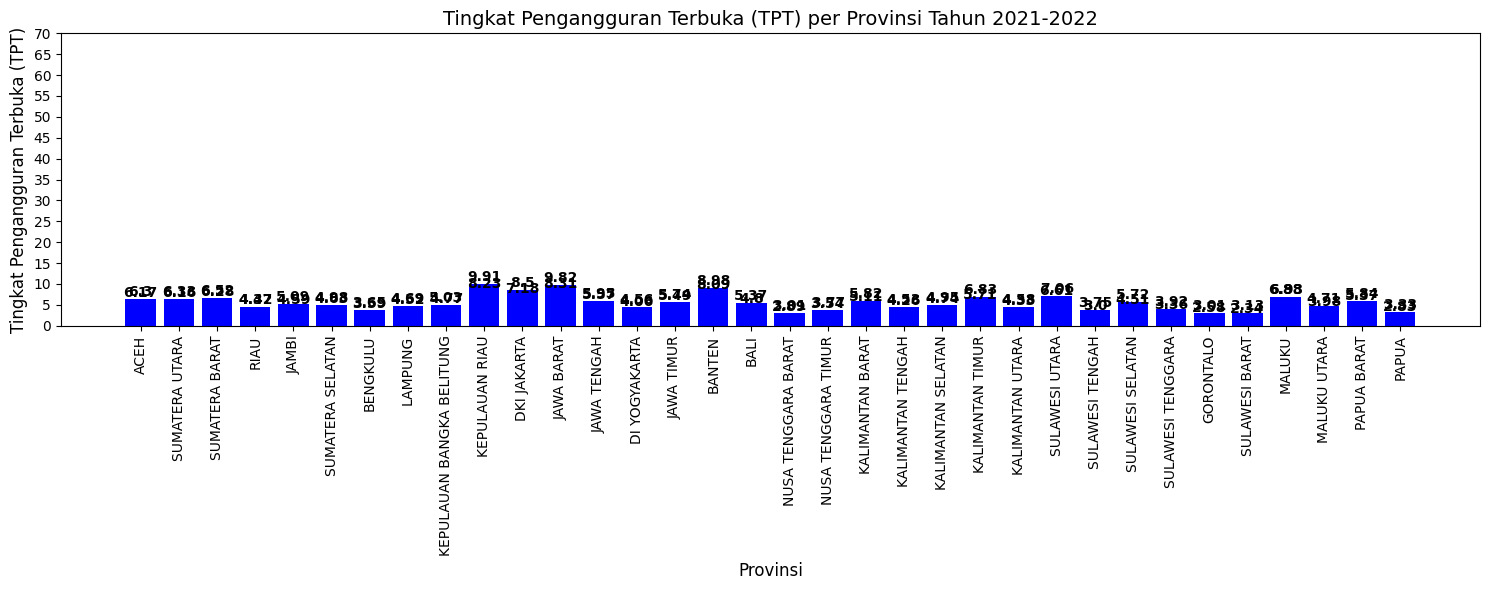

In [ ]:
import matplotlib.pyplot as plt

# Anggap df sudah memuat data yang sesuai
tpt = df['Tingkat Pengangguran Terbuka (TPT)']  # Gantilah dengan kolom yang sesuai dari data kamu

# Plot grafik batang
plt.figure(figsize=(15, 6))
bars_tpt = plt.bar(df['Provinsi'], tpt, color='blue', label='Tingkat Pengangguran Terbuka (TPT)')

plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Tingkat Pengangguran Terbuka (TPT)', fontsize=12)
plt.title('Tingkat Pengangguran Terbuka (TPT) per Provinsi Tahun 2021-2022', fontsize=14)

# Menyesuaikan sumbu Y untuk membuat jarak antar angka lebih baik
plt.yticks(range(0, 71, 5), fontsize=10)  # Mengatur jarak sumbu Y dengan interval 5

plt.xticks(rotation=90, ha='center', fontsize=10)  # Rotasi 90 derajat untuk label X
plt.yticks(fontsize=10)

# Menambahkan label pada bar chart
for i, bar in enumerate(bars_tpt):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

plt.tight_layout()  # Untuk memastikan layout tidak terpotong
plt.show()


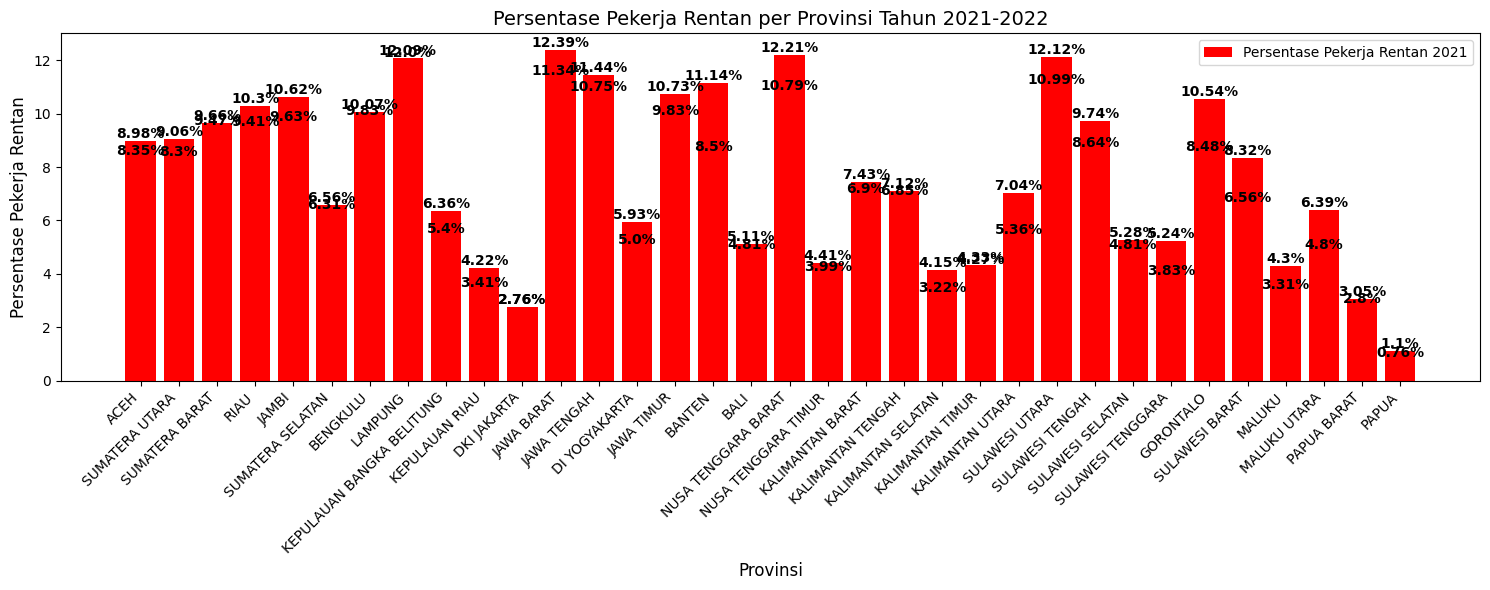

In [ ]:
import matplotlib.pyplot as plt

# Anggap df sudah memuat data yang sesuai
persentase_pekerja_rentan = df['Persentase Jumlah Pekerja Rentan']  # Kolom persentase jumlah pekerja rentan

# Plot grafik batang
plt.figure(figsize=(15, 6))
bars_perc_rentan = plt.bar(df['Provinsi'], persentase_pekerja_rentan, color='red', label='Persentase Pekerja Rentan 2021')

plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Persentase Pekerja Rentan', fontsize=12)
plt.title('Persentase Pekerja Rentan per Provinsi Tahun 2021-2022', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotasi label X
plt.yticks(fontsize=10)

# Menambahkan label pada bar chart
for bar in bars_perc_rentan:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

plt.tight_layout()  # Untuk memastikan layout tidak terpotong
plt.legend()
plt.show()


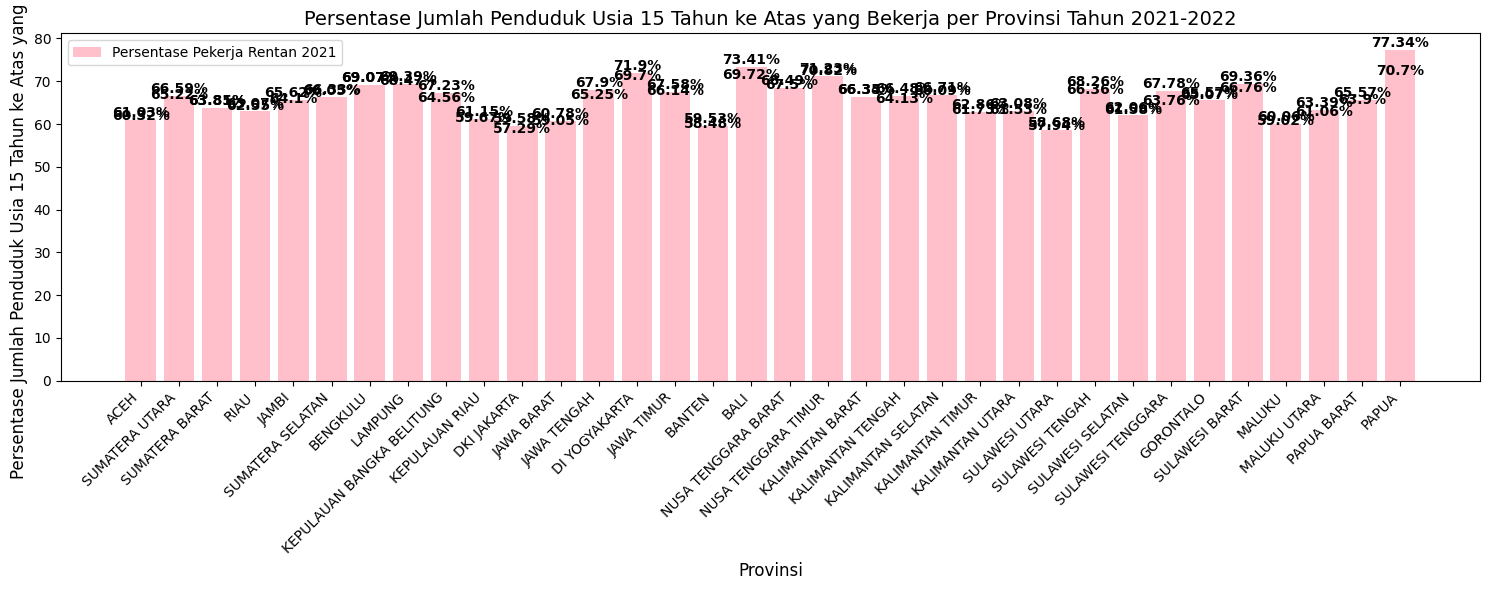

In [ ]:
import matplotlib.pyplot as plt

# Anggap df sudah memuat data yang sesuai
persentase_pekerja_rentan = df['Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja']  # Kolom persentase jumlah pekerja rentan

# Plot grafik batang
plt.figure(figsize=(15, 6))
bars_perc_rentan = plt.bar(df['Provinsi'], persentase_pekerja_rentan, color='pink', label='Persentase Pekerja Rentan 2021')

plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja', fontsize=12)
plt.title('Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja per Provinsi Tahun 2021-2022', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotasi label X
plt.yticks(fontsize=10)

# Menambahkan label pada bar chart
for bar in bars_perc_rentan:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

plt.tight_layout()  # Untuk memastikan layout tidak terpotong
plt.legend()
plt.show()

#**Pra Pemrosesan**

1. Cek Miss Value

In [ ]:
# Menampilkan persentase missing values per kolom
missing_values = df.isnull().mean() * 100
print(missing_values)

Tahun                                                            0.0
Provinsi                                                         0.0
Tingkat Pengangguran Terbuka (TPT)                               0.0
Tingkat Partisipasi Angkatan Kerja (TPAK)                        0.0
Persentase Jumlah Pekerja Rentan                                 0.0
Persentase Pekerja Sektor Informal                               0.0
Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja    0.0
dtype: float64


2. Cek Outlier

In [ ]:
# Pilih kolom numerik saja
numerik = df.select_dtypes(include='number')

# Cek outlier berdasarkan IQR
for col in numerik.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outlier)} outlier")


Tahun: 0 outlier
Tingkat Pengangguran Terbuka (TPT): 2 outlier
Tingkat Partisipasi Angkatan Kerja (TPAK): 3 outlier
Persentase Jumlah Pekerja Rentan: 0 outlier
Persentase Pekerja Sektor Informal: 11 outlier
Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja: 1 outlier


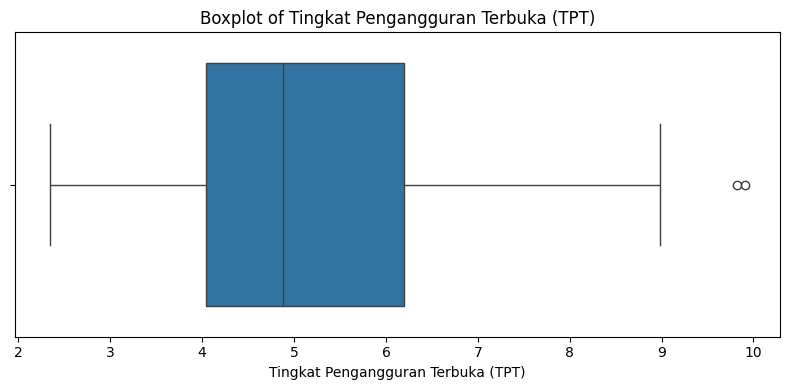

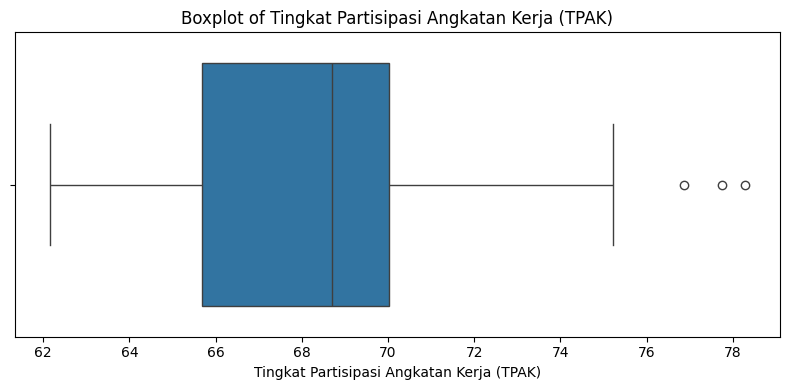

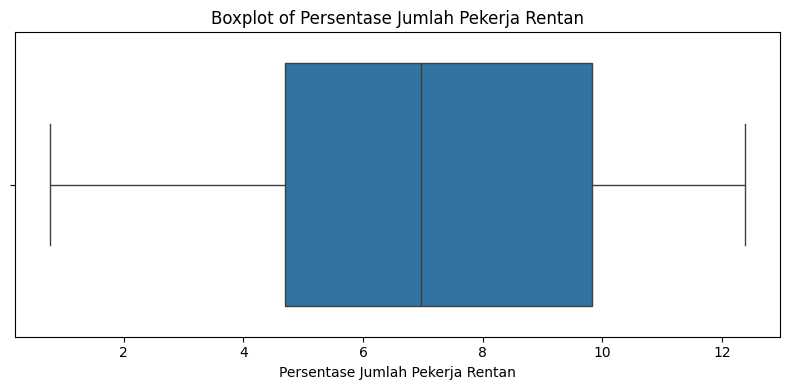

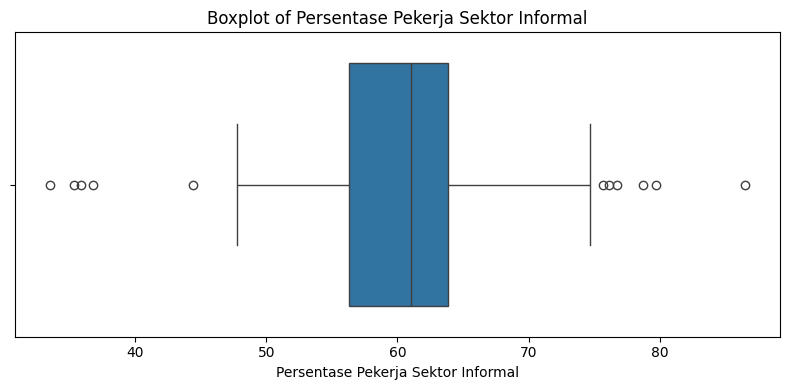

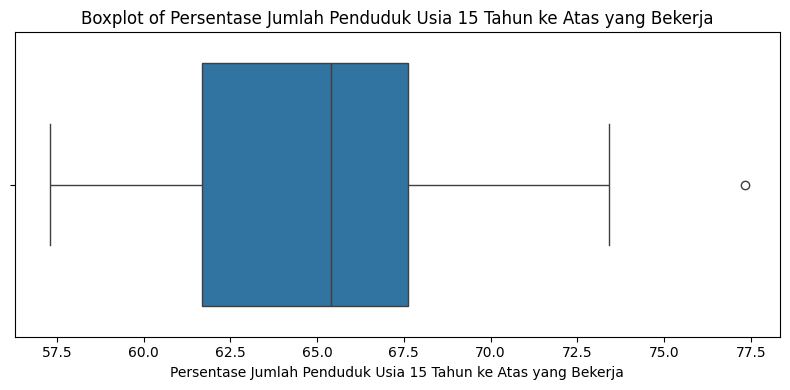

In [ ]:
# Bersihkan nama kolom (hapus spasi ekstra dan newline)
df.columns = df.columns.str.strip()

# Pilih semua kolom numerik, lalu drop kolom 'tahun' jika ada
df_numerik = df.select_dtypes(include='number')
if 'Tahun' in df_numerik.columns:
    df_numerik = df_numerik.drop(columns=['Tahun'])

# Buat boxplot satu per satu
for col in df_numerik.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

3. cek duplikat

In [ ]:
# Jumlah baris duplikat (seluruh kolom sama persis)
print("Jumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


In [ ]:
df.head()

,Tahun,Provinsi,Tingkat Pengangguran Terbuka (TPT),Tingkat Partisipasi Angkatan Kerja (TPAK),Persentase Jumlah Pekerja Rentan,Persentase Pekerja Sektor Informal,Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja
0,2021,ACEH,6.30,63.78,8.35,58.35,61.03
1,2021,SUMATERA UTARA,6.33,69.10,9.06,59.17,65.22
2,2021,SUMATERA BARAT,6.52,67.72,9.66,63.59,63.85
3,2021,RIAU,4.42,65.03,10.30,52.06,62.55
4,2021,JAMBI,5.09,67.17,10.62,62.79,64.10


# Modeling

## Model Tanpa Scaller

In [ ]:
#!pip install pyclustering
#!pip install scikit-learn-extra
#!pip install numpy==1.23.5 --force-reinstall
#!pip install scikit-fuzzy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import skfuzzy as fuzz

### K-Means Clustering

In [ ]:
features = ['Tingkat Pengangguran Terbuka (TPT)',
            'Tingkat Partisipasi Angkatan Kerja (TPAK)',
            'Persentase Pekerja Sektor Informal',
            'Persentase Jumlah Pekerja Rentan',
            'Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja']

X_raw = df[features]

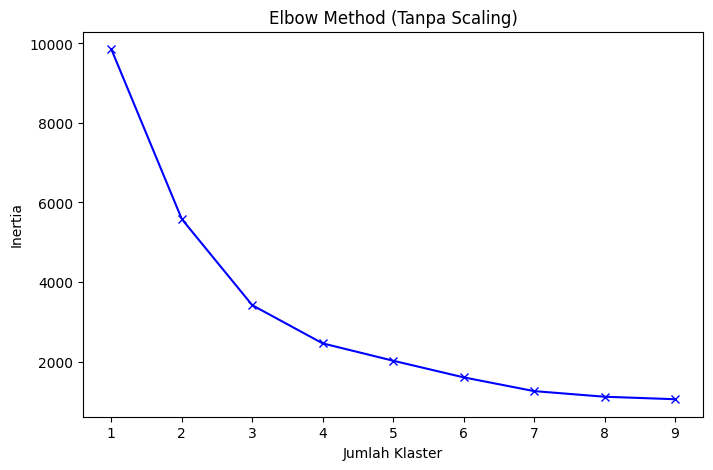

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_raw)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Elbow Method (Tanpa Scaling)')
plt.show()


Jumlah klaster optimal: 3


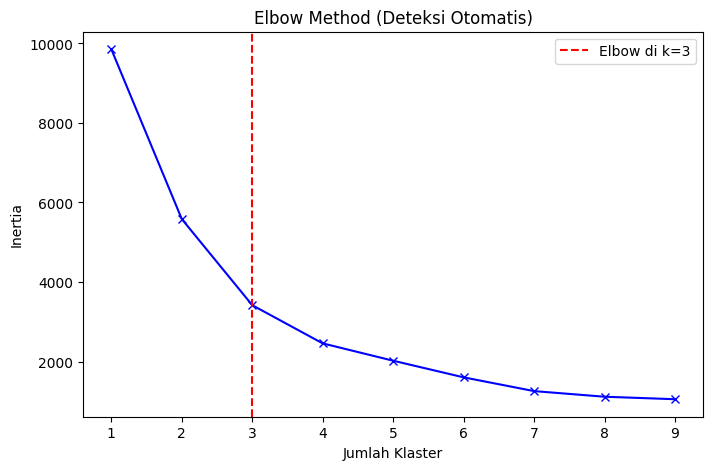

In [ ]:
#!pip install kneed
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from kneed import KneeLocator
import matplotlib.pyplot as plt



# 1. Hitung inertia untuk berbagai nilai k
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_raw)  # pastikan X_raw adalah DataFrame/array dengan variabel clustering
    inertia.append(kmeans.inertia_)

# 2. Definisikan fungsi untuk mencari elbow
def find_optimal_k(inertia_values, k_range):
    kl = KneeLocator(
        k_range,
        inertia_values,
        curve='convex',
        direction='decreasing',
        interp_method='polynomial',  # untuk hasil lebih halus
        polynomial_degree=5          # bisa disesuaikan ke 3 atau 7
    )
    return kl.elbow

# 3. Deteksi elbow
optimal_k = find_optimal_k(inertia, list(K))
print(f"Jumlah klaster optimal: {optimal_k}")

# 4. Plot Elbow dengan garis vertikal di titik optimal
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Elbow di k={optimal_k}')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Elbow Method (Deteksi Otomatis)')
plt.legend()
plt.show()

In [ ]:
# Tentukan jumlah cluster optimal berdasarkan Elbow Method (misalnya k=3)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_raw)

# Menambahkan hasil cluster ke data
df['Cluster_Without_Scaling'] = y_kmeans

In [ ]:
df.head(20)

,Tahun,Provinsi,Tingkat Pengangguran Terbuka (TPT),Tingkat Partisipasi Angkatan Kerja (TPAK),Persentase Jumlah Pekerja Rentan,Persentase Pekerja Sektor Informal,Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja,Cluster_Without_Scaling
0,2021,ACEH,6.30,63.78,8.35,58.35,61.03,0
1,2021,SUMATERA UTARA,6.33,69.10,9.06,59.17,65.22,0
2,2021,SUMATERA BARAT,6.52,67.72,9.66,63.59,63.85,0
3,2021,RIAU,4.42,65.03,10.30,52.06,62.55,1
4,2021,JAMBI,5.09,67.17,10.62,62.79,64.10,0
5,2021,SUMATERA SELATAN,4.98,68.77,6.56,65.18,66.33,0
6,2021,BENGKULU,3.65,69.75,10.07,70.34,69.07,2
7,2021,LAMPUNG,4.69,69.35,12.00,71.96,68.47,2
8,2021,KEPULAUAN BANGKA BELITUNG,5.03,65.88,6.36,50.73,64.56,1
9,2021,KEPULAUAN RIAU,9.91,68.27,4.22,35.36,59.67,1


In [ ]:
# Reduksi dimensi data menjadi 2D menggunakan PCA untuk visualisasi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_raw)

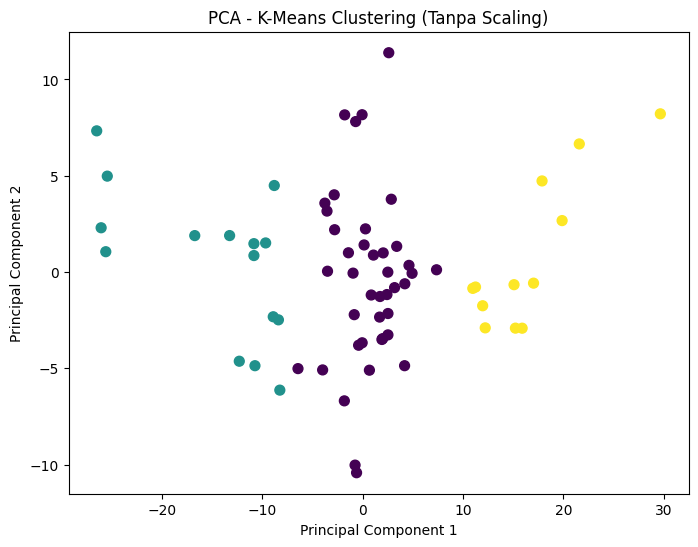

In [ ]:
# Plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['Cluster_Without_Scaling'], cmap='viridis', s=50)
plt.title('PCA - K-Means Clustering (Tanpa Scaling)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### K-Medoids

In [ ]:
# Tentukan jumlah cluster optimal berdasarkan Elbow Method (misalnya k=3)
k = 3
kmedoids = KMedoids(n_clusters=k, init='random', max_iter=300, random_state=0)
y_kmedoids_raw = kmedoids.fit_predict(X_raw)

# Menambahkan hasil cluster ke data (Tanpa scaling)
df['Cluster_KMedoids_Without_Scaling'] = y_kmedoids_raw

In [ ]:
df.head(20)

,Tahun,Provinsi,Tingkat Pengangguran Terbuka (TPT),Tingkat Partisipasi Angkatan Kerja (TPAK),Persentase Jumlah Pekerja Rentan,Persentase Pekerja Sektor Informal,Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja,Cluster_Without_Scaling,Cluster_KMedoids_Without_Scaling
0,2021,ACEH,6.30,63.78,8.35,58.35,61.03,0,0
1,2021,SUMATERA UTARA,6.33,69.10,9.06,59.17,65.22,0,0
2,2021,SUMATERA BARAT,6.52,67.72,9.66,63.59,63.85,0,0
3,2021,RIAU,4.42,65.03,10.30,52.06,62.55,1,2
4,2021,JAMBI,5.09,67.17,10.62,62.79,64.10,0,0
5,2021,SUMATERA SELATAN,4.98,68.77,6.56,65.18,66.33,0,0
6,2021,BENGKULU,3.65,69.75,10.07,70.34,69.07,2,1
7,2021,LAMPUNG,4.69,69.35,12.00,71.96,68.47,2,1
8,2021,KEPULAUAN BANGKA BELITUNG,5.03,65.88,6.36,50.73,64.56,1,2
9,2021,KEPULAUAN RIAU,9.91,68.27,4.22,35.36,59.67,1,2


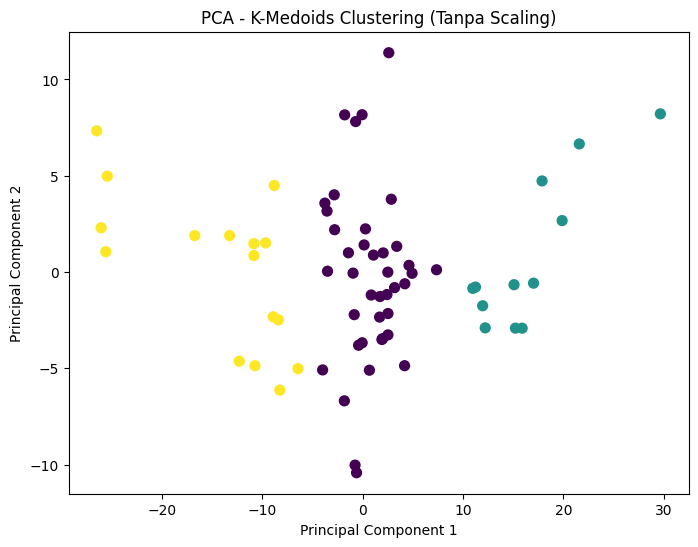

In [ ]:
# Reduksi dimensi data menjadi 2D menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_raw)

# Plot hasil clustering untuk K-Medoids tanpa scaling
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['Cluster_KMedoids_Without_Scaling'], cmap='viridis', s=50)
plt.title('PCA - K-Medoids Clustering (Tanpa Scaling)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Model dengan Scaller

### K-Means Clustering

Jumlah klaster optimal: 3


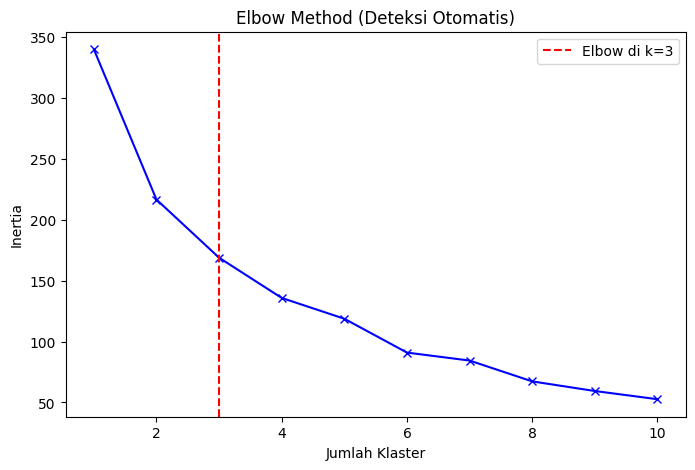

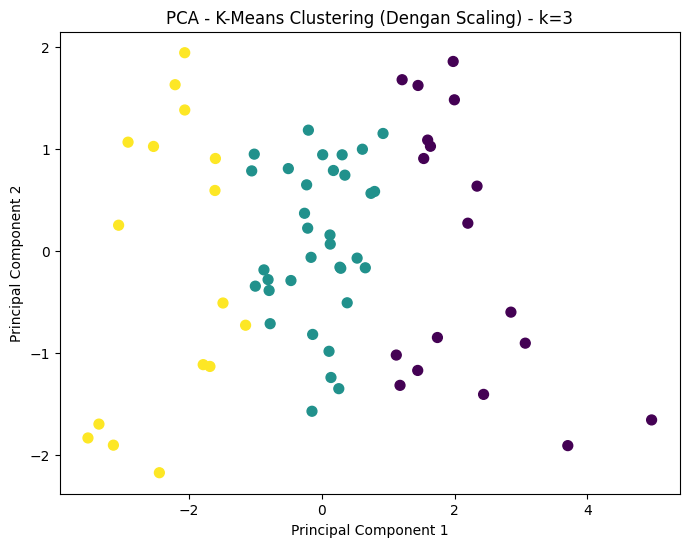

In [ ]:
# Variabel yang digunakan untuk clustering
features = ['Tingkat Pengangguran Terbuka (TPT)',
            'Tingkat Partisipasi Angkatan Kerja (TPAK)',
            'Persentase Pekerja Sektor Informal',
            'Persentase Jumlah Pekerja Rentan',
            'Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja']

# Data untuk clustering (tanpa scaling)
X_raw = df[features]

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Elbow Method untuk menentukan jumlah cluster dengan scaling
inertia = []
K = range(1, 11)  # jumlah cluster yang ingin dicoba (1 hingga 10)

# Hitung inertia untuk berbagai nilai k
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Menggunakan data yang sudah discale
    inertia.append(kmeans.inertia_)

# 2. Definisikan fungsi untuk mencari elbow
def find_optimal_k(inertia_values, k_range):
    kl = KneeLocator(
        k_range,
        inertia_values,
        curve='convex',
        direction='decreasing',
        interp_method='polynomial',  # untuk hasil lebih halus
        polynomial_degree=5          # bisa disesuaikan ke 3 atau 7
    )
    return kl.elbow

# 3. Deteksi elbow
optimal_k = find_optimal_k(inertia, list(K))
print(f"Jumlah klaster optimal: {optimal_k}")

# 4. Plot Elbow dengan garis vertikal di titik optimal
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Elbow di k={optimal_k}')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Elbow Method (Deteksi Otomatis)')
plt.legend()
plt.show()

# Berdasarkan hasil elbow method, tentukan jumlah cluster (misalnya k=optimal_k)
kmeans_scaled = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)

# Menambahkan hasil cluster ke data
df['Cluster_With_Scaling'] = y_kmeans_scaled

# Reduksi dimensi data menjadi 2D menggunakan PCA untuk visualisasi
pca_scaled = PCA(n_components=2)
data_pca_scaled = pca_scaled.fit_transform(X_scaled)

# Plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_scaled[:, 0], data_pca_scaled[:, 1], c=df['Cluster_With_Scaling'], cmap='viridis', s=50)
plt.title(f'PCA - K-Means Clustering (Dengan Scaling) - k={optimal_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### K-Medoids

Jumlah klaster optimal: 4


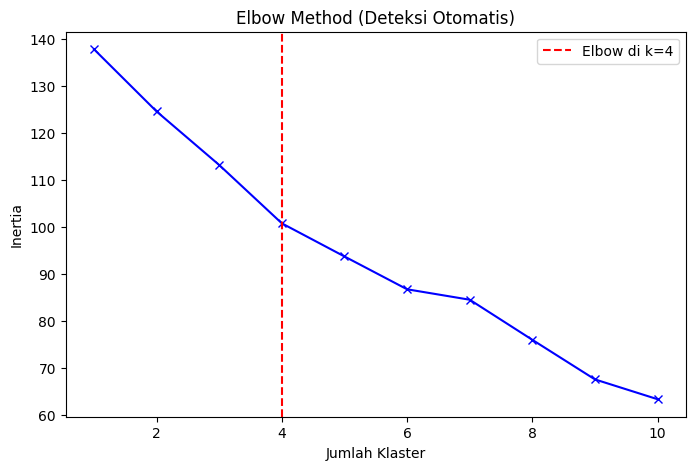

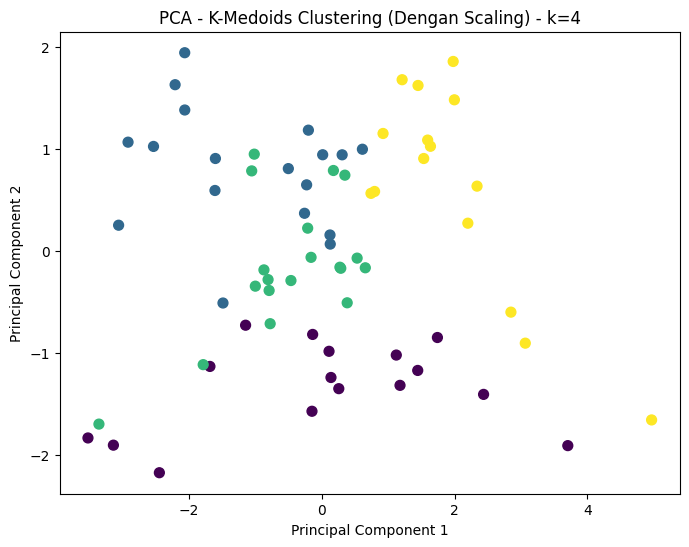

In [ ]:
# Data untuk clustering (tanpa scaling)
X_raw = df[features]

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Elbow Method untuk menentukan jumlah cluster dengan scaling (K-Medoids)
inertia = []
K = range(1, 11)  # jumlah cluster yang ingin dicoba (1 hingga 10)

# Hitung inertia untuk berbagai nilai k
for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='euclidean')
    kmedoids.fit(X_scaled)  # Menggunakan data yang sudah discale
    inertia.append(kmedoids.inertia_)

# 2. Definisikan fungsi untuk mencari elbow
def find_optimal_k(inertia_values, k_range):
    kl = KneeLocator(
        k_range,
        inertia_values,
        curve='convex',
        direction='decreasing',
        interp_method='polynomial',  # untuk hasil lebih halus
        polynomial_degree=5          # bisa disesuaikan ke 3 atau 7
    )
    return kl.elbow

# 3. Deteksi elbow
optimal_k = find_optimal_k(inertia, list(K))
print(f"Jumlah klaster optimal: {optimal_k}")

# 4. Plot Elbow dengan garis vertikal di titik optimal
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Elbow di k={optimal_k}')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Elbow Method (Deteksi Otomatis)')
plt.legend()
plt.show()

# Berdasarkan hasil elbow method, tentukan jumlah cluster (misalnya k=optimal_k)
kmedoids_scaled = KMedoids(n_clusters=optimal_k, random_state=0, metric='euclidean')
y_kmedoids_scaled = kmedoids_scaled.fit_predict(X_scaled)

# Menambahkan hasil cluster ke data
df['Cluster_With_Scaling_KMedoids'] = y_kmedoids_scaled

# Reduksi dimensi data menjadi 2D menggunakan PCA untuk visualisasi
pca_scaled = PCA(n_components=2)
data_pca_scaled = pca_scaled.fit_transform(X_scaled)

# Plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_scaled[:, 0], data_pca_scaled[:, 1], c=df['Cluster_With_Scaling_KMedoids'], cmap='viridis', s=50)
plt.title(f'PCA - K-Medoids Clustering (Dengan Scaling) - k={optimal_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluasi Model

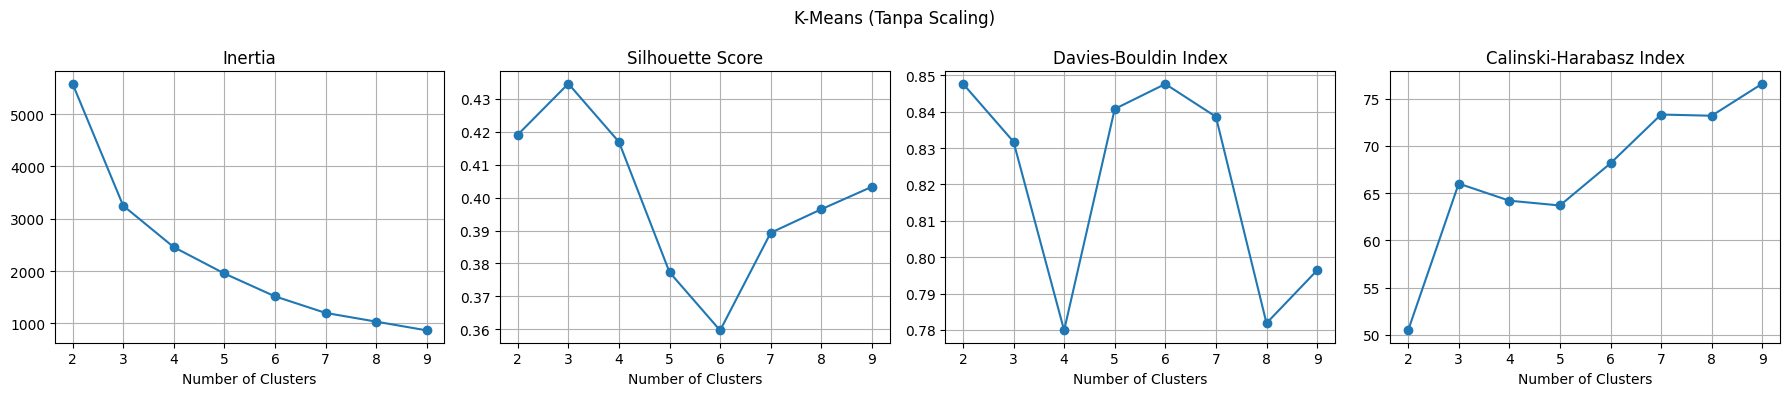

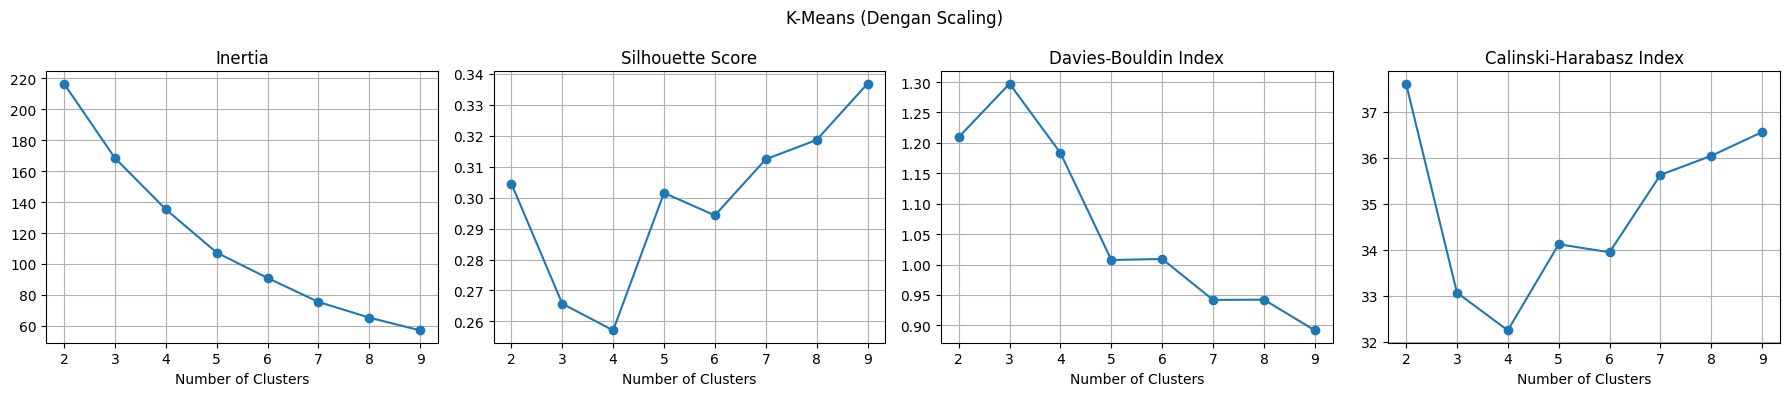

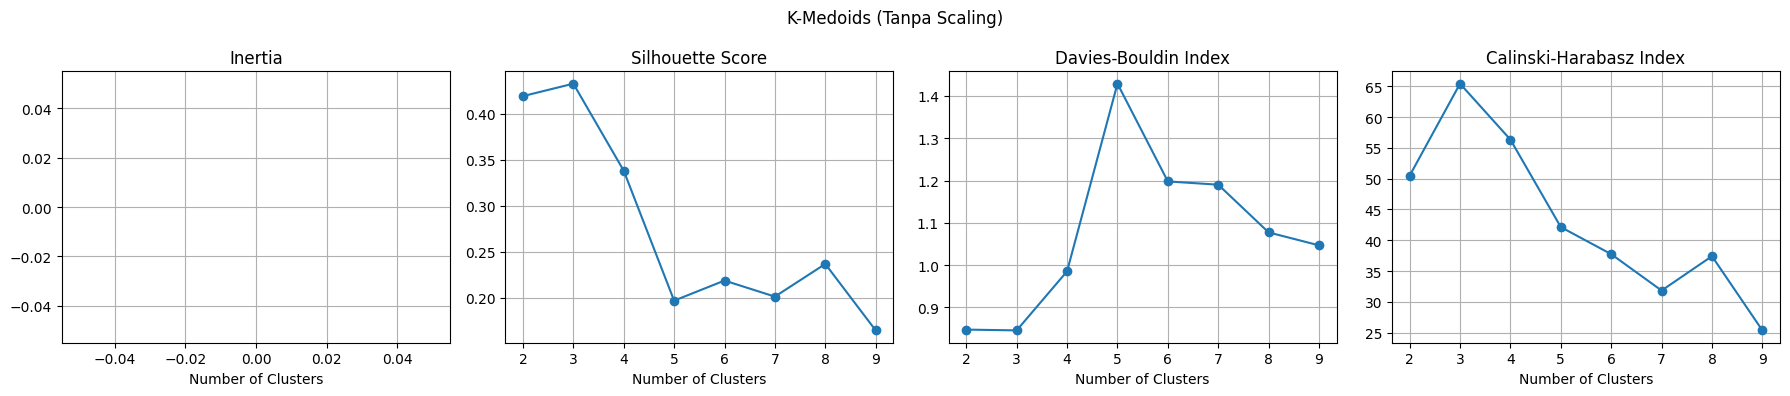

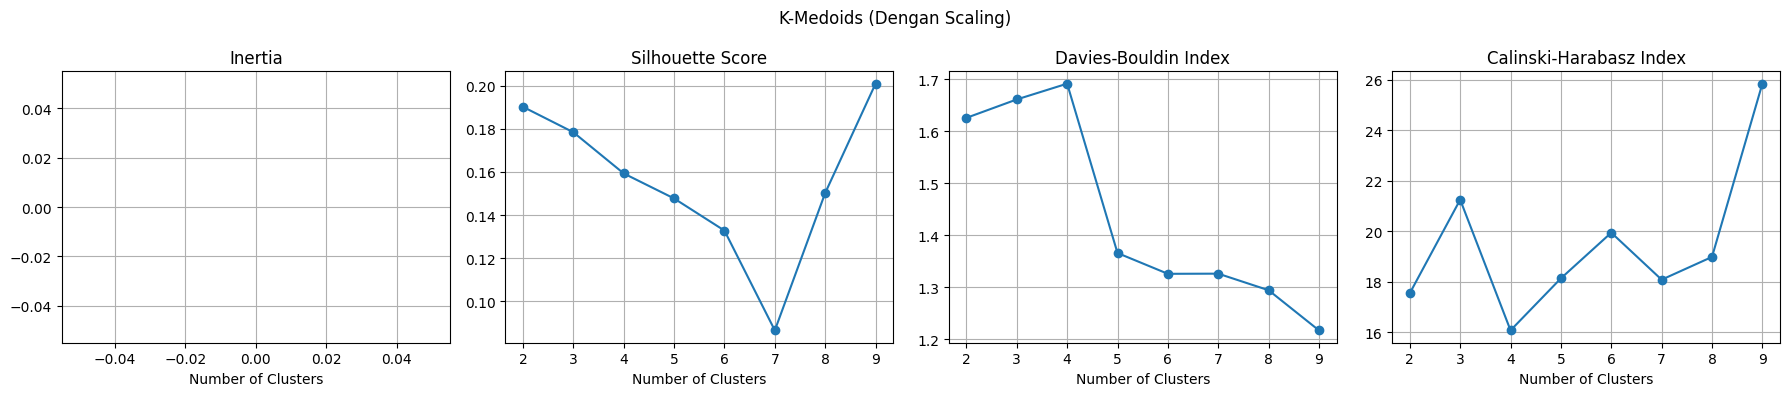

In [ ]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fungsi evaluasi clustering
def evaluate_clustering(X, method, k_range):
    inertia = []
    silhouette = []
    db_index = []
    ch_index = []

    for k in k_range:
        if method == 'KMeans':
            model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
        elif method == 'KMedoids':
            model = KMedoids(n_clusters=k, random_state=42)
        else:
            raise ValueError("Unknown method")

        model.fit(X)
        labels = model.predict(X) if method == 'KMeans' else model.labels_

        inertia.append(model.inertia_ if method == 'KMeans' else np.nan)
        silhouette.append(silhouette_score(X, labels))
        db_index.append(davies_bouldin_score(X, labels))
        ch_index.append(calinski_harabasz_score(X, labels))

    return inertia, silhouette, db_index, ch_index

# Range cluster (mulai dari 2 karena evaluasi butuh minimal 2 cluster)
k_range = range(2, 10)

# Evaluasi semua kombinasi
inertia_kmeans_raw, sil_kmeans_raw, db_kmeans_raw, ch_kmeans_raw = evaluate_clustering(X_raw, 'KMeans', k_range)
inertia_kmeans_scaled, sil_kmeans_scaled, db_kmeans_scaled, ch_kmeans_scaled = evaluate_clustering(X_scaled, 'KMeans', k_range)
inertia_kmedoids_raw, sil_kmedoids_raw, db_kmedoids_raw, ch_kmedoids_raw = evaluate_clustering(X_raw, 'KMedoids', k_range)
inertia_kmedoids_scaled, sil_kmedoids_scaled, db_kmedoids_scaled, ch_kmedoids_scaled = evaluate_clustering(X_scaled, 'KMedoids', k_range)

# Fungsi plotting evaluasi
def plot_evaluation(inertia, silhouette, db_index, ch_index, title):
    plt.figure(figsize=(18, 4))

    plt.subplot(1, 4, 1)
    plt.plot(k_range, inertia, 'o-')
    plt.title('Inertia')
    plt.xlabel('Number of Clusters')
    plt.grid()

    plt.subplot(1, 4, 2)
    plt.plot(k_range, silhouette, 'o-')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.grid()

    plt.subplot(1, 4, 3)
    plt.plot(k_range, db_index, 'o-')
    plt.title('Davies-Bouldin Index')
    plt.xlabel('Number of Clusters')
    plt.grid()

    plt.subplot(1, 4, 4)
    plt.plot(k_range, ch_index, 'o-')
    plt.title('Calinski-Harabasz Index')
    plt.xlabel('Number of Clusters')
    plt.grid()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot hasil evaluasi
plot_evaluation(inertia_kmeans_raw, sil_kmeans_raw, db_kmeans_raw, ch_kmeans_raw, 'K-Means (Tanpa Scaling)')
plot_evaluation(inertia_kmeans_scaled, sil_kmeans_scaled, db_kmeans_scaled, ch_kmeans_scaled, 'K-Means (Dengan Scaling)')
plot_evaluation(inertia_kmedoids_raw, sil_kmedoids_raw, db_kmedoids_raw, ch_kmedoids_raw, 'K-Medoids (Tanpa Scaling)')
plot_evaluation(inertia_kmedoids_scaled, sil_kmedoids_scaled, db_kmedoids_scaled, ch_kmedoids_scaled, 'K-Medoids (Dengan Scaling)')

# Terapkan clustering berdasarkan k optimal (berdasarkan evaluasi visual/manual)
k_kmeans_raw = 3
k_kmeans_scaled = 3
k_kmedoids_raw = 3
k_kmedoids_scaled = 4

# Model Akhir Setelah Evaluasi

In [ ]:
# ===============================
# Clustering Akhir Berdasarkan K Optimal
# ===============================

# Terapkan KMeans dan KMedoids sesuai jumlah cluster optimal
df['Cluster_KMeans_Raw'] = KMeans(n_clusters=k_kmeans_raw, random_state=42).fit_predict(X_raw)
df['Cluster_KMeans_Scaled'] = KMeans(n_clusters=k_kmeans_scaled, random_state=42).fit_predict(X_scaled)
df['Cluster_KMedoids_Raw'] = KMedoids(n_clusters=k_kmedoids_raw, random_state=42).fit_predict(X_raw)
df['Cluster_KMedoids_Scaled'] = KMedoids(n_clusters=k_kmedoids_scaled, random_state=42).fit_predict(X_scaled)

# Tampilkan hasil akhir (5 baris pertama)
print(df.head())

   Tahun        Provinsi  Tingkat Pengangguran Terbuka (TPT)  \
0   2021            ACEH                                6.30   
1   2021  SUMATERA UTARA                                6.33   
2   2021  SUMATERA BARAT                                6.52   
3   2021            RIAU                                4.42   
4   2021           JAMBI                                5.09   

   Tingkat Partisipasi Angkatan Kerja (TPAK)  \
0                                      63.78   
1                                      69.10   
2                                      67.72   
3                                      65.03   
4                                      67.17   

   Persentase Jumlah Pekerja Rentan  Persentase Pekerja Sektor Informal  \
0                              8.35                               58.35   
1                              9.06                               59.17   
2                              9.66                               63.59   
3                         

In [ ]:
# ===============================
# Buat DataFrame Evaluasi K Optimal Saja
# ===============================

# Daftar k optimal yang telah ditentukan sebelumnya
k_optimal = {
    'KMeans Raw': k_kmeans_raw,
    'KMeans Scaled': k_kmeans_scaled,
    'KMedoids Raw': k_kmedoids_raw,
    'KMedoids Scaled': k_kmedoids_scaled
}

# Buat DataFrame dari hasil evaluasi lengkap
full_eval_df = pd.DataFrame({
    'K': list(k_range) * 4,
    'Metode': (['KMeans Raw'] * len(k_range) +
               ['KMeans Scaled'] * len(k_range) +
               ['KMedoids Raw'] * len(k_range) +
               ['KMedoids Scaled'] * len(k_range)),
    'Inertia': (inertia_kmeans_raw +
                inertia_kmeans_scaled +
                inertia_kmedoids_raw +
                inertia_kmedoids_scaled),
    'Silhouette': (sil_kmeans_raw +
                   sil_kmeans_scaled +
                   sil_kmedoids_raw +
                   sil_kmedoids_scaled),
    'Davies-Bouldin': (db_kmeans_raw +
                       db_kmeans_scaled +
                       db_kmedoids_raw +
                       db_kmedoids_scaled),
    'Calinski-Harabasz': (ch_kmeans_raw +
                          ch_kmeans_scaled +
                          ch_kmedoids_raw +
                          ch_kmedoids_scaled)
})

# Filter hanya baris dengan k optimal
eval_df_optimal = pd.concat([
    full_eval_df[(full_eval_df['Metode'] == metode) & (full_eval_df['K'] == k)]
    for metode, k in k_optimal.items()
], ignore_index=True)

# Format angka agar rapi
pd.set_option('display.float_format', lambda x: f'{x:.4f}')

# Tampilkan hasil evaluasi k optimal
print("\n=== Evaluasi Clustering pada K Optimal ===")
print(eval_df_optimal)

# Tampilkan hasil clustering akhir
print("\n=== Hasil Clustering (5 baris pertama) ===")
print(df.head())


=== Evaluasi Clustering pada K Optimal ===
   K           Metode   Inertia  Silhouette  Davies-Bouldin  Calinski-Harabasz
0  3       KMeans Raw 3250.8274      0.4346          0.8318            66.0119
1  3    KMeans Scaled  168.5205      0.2657          1.2973            33.0707
2  3     KMedoids Raw       NaN      0.4327          0.8459            65.4122
3  4  KMedoids Scaled       NaN      0.1593          1.6917            16.0713

=== Hasil Clustering (5 baris pertama) ===
   Tahun        Provinsi  Tingkat Pengangguran Terbuka (TPT)  \
0   2021            ACEH                              6.3000   
1   2021  SUMATERA UTARA                              6.3300   
2   2021  SUMATERA BARAT                              6.5200   
3   2021            RIAU                              4.4200   
4   2021           JAMBI                              5.0900   

   Tingkat Partisipasi Angkatan Kerja (TPAK)  \
0                                    63.7800   
1                                   